In [27]:
# Import dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

In [28]:
# Loads the data into a DataFrame
df = pd.read_csv("Resources/filtered_encoded_dataset.csv")

df.head()

,Unnamed: 0,primary_artist,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,0,Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,...,0,0,0,0,0,0,0,0,0,1
1,1,Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,...,0,0,0,0,0,0,0,0,0,1
2,2,Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,...,0,0,0,0,0,0,0,0,0,1
3,3,Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,...,0,0,0,0,0,0,0,0,0,1
4,4,Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,...,0,0,0,0,0,0,0,0,0,1


In [29]:
df_clean = df.drop(["Unnamed: 0","key_0", "key_1","key_2","key_3","key_4",
             "key_5", "key_6","key_7","key_8","key_9", "key_10","key_11","num_artists_binned_1","num_artists_binned_2",
              "num_artists_binned_3","num_artists_binned_4","num_artists_binned_5","num_artists_binned_6"], axis=1)
df_clean.head()

,primary_artist,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,time_signature_3,time_signature_4,time_signature_5,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,...,0,1,0,0,0,0,0,0,0,1
1,Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,...,0,1,0,0,0,0,0,0,0,1
2,Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,...,0,1,0,0,0,0,0,0,0,1
3,Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,...,1,0,0,0,0,0,0,0,0,1
4,Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,...,0,1,0,0,0,0,0,0,0,1


In [30]:
df.columns

Index(['Unnamed: 0', 'primary_artist', 'track_name', 'popularity', 'explicit',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'time_signature_0', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'num_artists_binned_1',
       'num_artists_binned_2', 'num_artists_binned_3', 'num_artists_binned_4',
       'num_artists_binned_5', 'num_artists_binned_6', 'track_genre_0',
       'track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4',
       'track_genre_5', 'track_genre_6'],
      dtype='object')

In [36]:
features = ["popularity","danceability", "energy","loudness","tempo"]

In [32]:
df = df.dropna(subset=features)

In [34]:
df.set_index("primary_artist",inplace = True)
df.head()

,Unnamed: 0,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
primary_artist,,,,,,,,,,,,,,,,,,,,,
Gen Hoshino,0,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,...,0,0,0,0,0,0,0,0,0,1
Ben Woodward,1,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,...,0,0,0,0,0,0,0,0,0,1
Ingrid Michaelson,2,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,...,0,0,0,0,0,0,0,0,0,1
Kina Grannis,3,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,...,0,0,0,0,0,0,0,0,0,1
Chord Overstreet,4,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,...,0,0,0,0,0,0,0,0,0,1


In [37]:
data = df[features].copy()
data.head()

,popularity,danceability,energy,loudness,tempo
primary_artist,,,,,
Gen Hoshino,73,0.676,0.4610,-6.746,87.917
Ben Woodward,55,0.420,0.1660,-17.235,77.489
Ingrid Michaelson,57,0.438,0.3590,-9.734,76.332
Kina Grannis,71,0.266,0.0596,-18.515,181.740
Chord Overstreet,82,0.618,0.4430,-9.681,119.949


In [38]:
data_scaled = StandardScaler().fit_transform(
    data)

In [39]:
 # Create a DataFrame with the scaled data
df_data_scaled = pd.DataFrame(
    data_scaled,
    columns= data.columns
)

# Copy the tickers names from the original data
df_data_scaled["primary_artist"] = data.index

# Set the Ticker column as index
df_data_scaled = df_data_scaled.set_index("primary_artist")

# Display sample data
df_data_scaled.head()

,popularity,danceability,energy,loudness,tempo
primary_artist,,,,,
Gen Hoshino,1.780470,0.628394,-0.721328,0.298800,-1.142994
Ben Woodward,0.972707,-0.847891,-1.896382,-1.794228,-1.490909
Ingrid Michaelson,1.062459,-0.744089,-1.127618,-0.297440,-1.529510
Kina Grannis,1.690719,-1.735968,-2.320198,-2.049645,1.987275
Chord Overstreet,2.184352,0.293923,-0.793026,-0.286864,-0.074292


In [41]:
df_data_scaled.dtypes

popularity      float64
danceability    float64
energy          float64
loudness        float64
tempo           float64
dtype: object

In [40]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_data_scaled)
    inertia.append(k_model.inertia_)
    
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
               

AttributeError: 'NoneType' object has no attribute 'split'

In [8]:
# Scale the data
data = (data - data.min()) / (data.max() - data.min()) * 9 +1
data.describe()

,popularity,danceability,energy,loudness,tempo
count,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,3.999199,6.180997,6.778818,7.873247,5.518111
std,2.005547,1.584449,2.259480,0.834264,1.108413
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.530000,5.166497,5.257000,7.581155,4.672008
50%,4.150000,6.299492,7.165000,8.080739,5.512351
75%,5.500000,7.350254,8.686000,8.413018,6.179996
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head()

,popularity,danceability,energy,loudness,tempo
0,7.57,7.176650,5.1490,8.122524,4.251208
1,5.95,4.837563,2.4940,6.376394,3.865576
2,6.13,5.002030,4.2310,7.625104,3.822790
3,7.39,3.430457,1.5364,6.163309,7.720822
4,8.38,6.646701,4.9870,7.633927,5.435765


In [10]:
# Initialize random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(data, 4)
centroids

,0,1,2,3
popularity,4.510000,3.520000,3.430000,3.070000
danceability,5.321827,7.130964,6.573604,5.833503
energy,7.129000,5.518000,9.496000,7.912000
loudness,8.375895,8.465623,8.254869,7.529382
tempo,3.359166,5.584796,6.913355,4.767011


In [12]:
# Label each data point
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)   
labels = get_labels(data, centroids)
labels.value_counts()

1    45616
2    27801
3    22658
0    17474
dtype: int64

In [13]:
# update centroids

In [14]:
def new_centroids(data, labels, k):
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [15]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [16]:
def plot_clusters(data, labels, centroids, interations):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids[:,1])
    plt.show()
plot_clusters

<function __main__.plot_clusters(data, labels, centroids, interations)>

InvalidIndexError: (slice(None, None, None), 1)

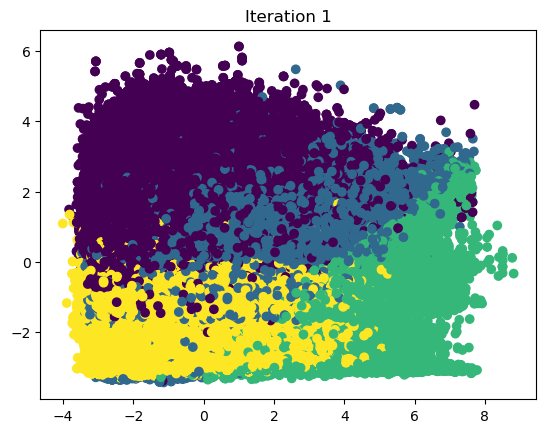

In [17]:
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(4)
kmeans.fit(data)


In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
pd.DataFrame(centroids, columns = features).T